# Polynomial Linear Regression

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('../datasets/Position_Salaries.csv')

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


In [6]:
# df.columns = ["temperature", "ice_cream_sales"]

In [7]:
# Separating predictors from target
X = df.drop(["Salary", "Position"], axis=1)
y = df["Salary"]

### Train the Linear Regression Model on the Dataset

In [8]:
from sklearn.linear_model import LinearRegression
simple_model = LinearRegression()
simple_model.fit(X, y)

LinearRegression()

In [9]:
simple_model.coef_

array([80878.78787879])

In [10]:
simple_model.intercept_

-195333.3333333332

### Training the Polynomial Regression model on the whole dataset

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial features
poly_instance = PolynomialFeatures(degree = 5)
X_poly_features = poly_instance.fit_transform(X)

# building and fitting the polynomial model 
poly_model = LinearRegression()
poly_model.fit(X_poly_features, y)

LinearRegression()

In [12]:
poly_instance

PolynomialFeatures(degree=5)

In [13]:
X_poly_features

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [14]:
poly_model.coef_

array([ 0.00000000e+00,  1.60731002e+05, -1.00378788e+05,  2.81649184e+04,
       -3.44638695e+03,  1.57692308e+02])

In [15]:
poly_model.intercept_

-41333.33333268855

### Visualising the Linear Regression results

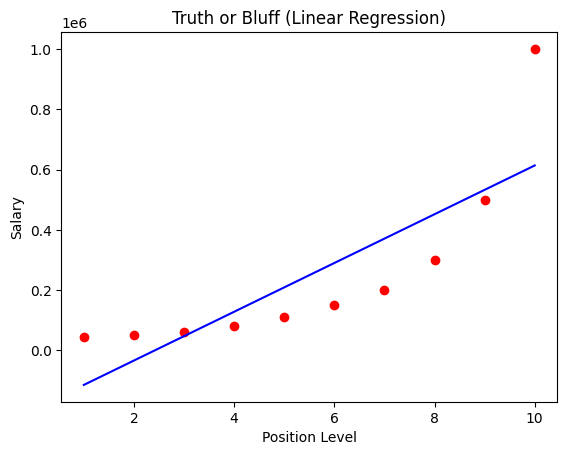

In [16]:
plt.scatter(X, y, color = 'red')
plt.plot(X, simple_model.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Evaluating the Simple model

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

score = r2_score(y, simple_model.predict(X))
mae = mean_absolute_error(y, simple_model.predict(X))
mse = mean_squared_error(y, simple_model.predict(X))

print("R-squared: ", score)
print("MAE: ", mae)
print("MSE: ", mse)

R-squared:  0.6690412331929895
MAE:  128454.54545454546
MSE:  26695878787.878788


## Visualising the Polynomial Regression results

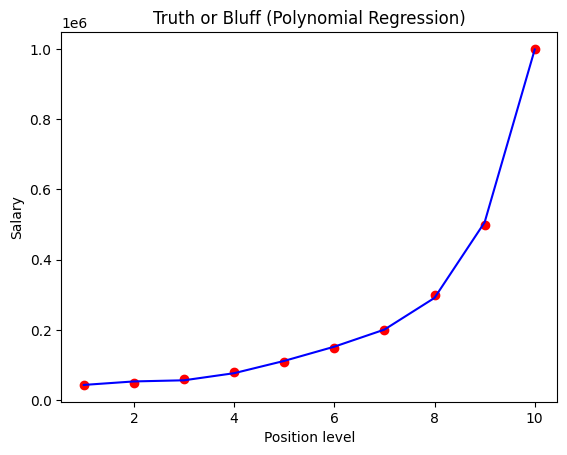

In [18]:
plt.scatter(X, y, color = 'red')
plt.plot(X, poly_model.predict(poly_instance.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Evaluating the Multiple Polynomial Model

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

score = r2_score(y, poly_model.predict(poly_instance.fit_transform(X)))
mae = mean_absolute_error(y, poly_model.predict(poly_instance.fit_transform(X)))
mse = mean_squared_error(y, poly_model.predict(poly_instance.fit_transform(X)))

print("R-squared: ", score)
print("MAE: ", mae)
print("MSE: ", mse)

R-squared:  0.9997969027099755
MAE:  3360.8391607084804
MSE:  16382284.382283146
